# Vairous Definitions of Chemical Potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from exogibbs.presets.ykb4 import load_molname_ykb4, load_JANAF_molecules

df_molname = load_molname_ykb4()
path_JANAF_data = "/home/kawahara/thermochemical_equilibrium/Equilibrium/JANAF"
gibbs_matrices = load_JANAF_molecules(df_molname, path_JANAF_data)


T_h_table = gibbs_matrices["H1"]['T(K)'].to_numpy()
T_h2_table = gibbs_matrices["H2"]['T(K)'].to_numpy()

# uses delta-f G as chemical potential Smith & Missen 3-12.2
kJtoJ = 1000.0

mu_h_table = gibbs_matrices["H1"]['delta-f G'].to_numpy() * kJtoJ #J/mol
mu_h2_table = gibbs_matrices["H2"]['delta-f G'].to_numpy() * kJtoJ  #J/mol



/home/kawahara/exogibbs/src/exogibbs/io/load_data.py:139: RuntimeWarning: Failed to load /home/kawahara/thermochemical_equilibrium/Equilibrium/JANAF/S8(g).txt: Error tokenizing data. C error: Expected 8 fields in line 17, saw 22

  warnings.warn(f"Failed to load {file_path}: {exc}", RuntimeWarning)


$\mu^\circ (T) = \Delta_f G(T)$ (delta-f G)

In [2]:
#gets index at T_h_table = 298.15
index_h = np.where(np.isclose(T_h_table, 298.15))[0][0]
index_h2 = np.where(np.isclose(T_h2_table, 298.15))[0][0]
T_h_table[index_h], T_h2_table[index_h2]

(298.15, 298.15)

$\mu^\circ (T) = - T \left( - \frac{G^\circ (T) - H_{298}^\circ}{T} \right) + \Delta H_{f, 298}^\circ$   (FEF)

See also https://github.com/dzesmin/TEA/blob/0ec66410f274d9deea7764d53d6363f9aaad3355/tea/makeheader.py#L198

In [3]:

# computes chemical potential from Free Energy Function Smith & Missen 3.12-5a
fef_h_table = gibbs_matrices["H1"]['-[G-H(Tr)]/T'].to_numpy() #J/K/mol
fef_h2_table = gibbs_matrices["H2"]['-[G-H(Tr)]/T'].to_numpy() #J/K/mol

dHf_h_298 = gibbs_matrices["H1"]['delta-f H'].to_numpy()[index_h] * kJtoJ #J/mol
dHf_h2_298 = gibbs_matrices["H2"]['delta-f H'].to_numpy()[index_h2] * kJtoJ #J/mol


mu_fef_h_table = -T_h_table * fef_h_table  + dHf_h_298
mu_fef_h2_table = -T_h2_table * fef_h2_table  + dHf_h2_298 

/tmp/ipykernel_11215/799604993.py:9: RuntimeWarning: invalid value encountered in multiply
  mu_fef_h_table = -T_h_table * fef_h_table  + dHf_h_298
/tmp/ipykernel_11215/799604993.py:10: RuntimeWarning: invalid value encountered in multiply
  mu_fef_h2_table = -T_h2_table * fef_h2_table  + dHf_h2_298


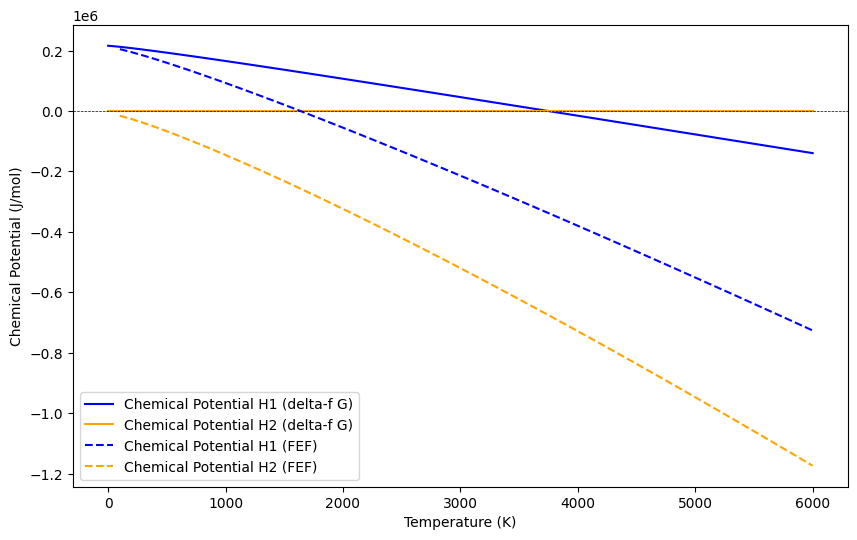

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(T_h_table, mu_h_table, label='Chemical Potential H1 (delta-f G)', color='blue')
plt.plot(T_h2_table, mu_h2_table, label='Chemical Potential H2 (delta-f G)', color='orange')
plt.plot(T_h_table, mu_fef_h_table, label='Chemical Potential H1 (FEF)', linestyle='--', color='blue')
plt.plot(T_h2_table, mu_fef_h2_table, label='Chemical Potential H2 (FEF)', linestyle='--', color='orange')

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Chemical Potential (J/mol)')
plt.legend()

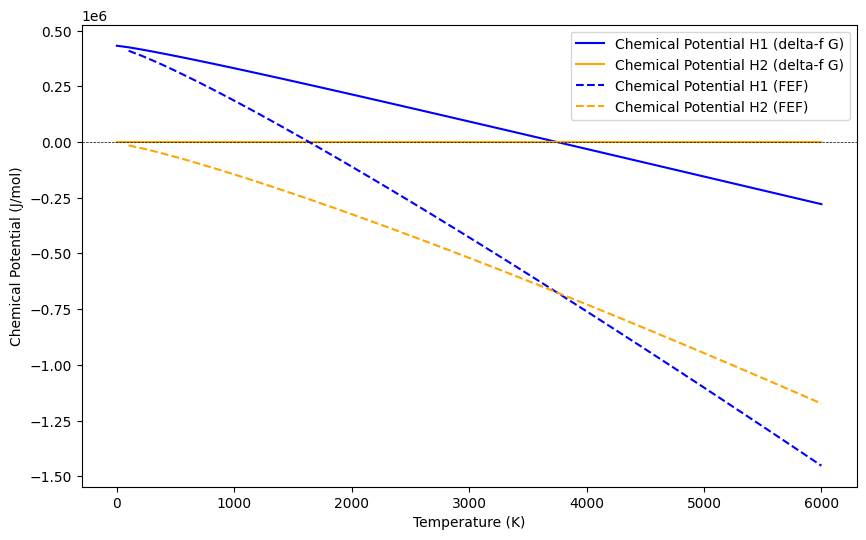

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(T_h_table, 2*mu_h_table , label='Chemical Potential H1 (delta-f G)', color='blue')
plt.plot(T_h2_table, mu_h2_table , label='Chemical Potential H2 (delta-f G)', color='orange')
plt.plot(T_h_table, 2*mu_fef_h_table, label='Chemical Potential H1 (FEF)', linestyle='--', color='blue')
plt.plot(T_h2_table, mu_fef_h2_table, label='Chemical Potential H2 (FEF)', linestyle='--', color='orange')

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Chemical Potential (J/mol)')
plt.legend()

$\mu^\circ_\mathrm{H}(\mathrm{delta-f G}) = \mu^\circ_\mathrm{H} (\mathrm{FEF}) - \frac{1}{2} \mu^\circ_\mathrm{ref} (\mathrm{FEF})$

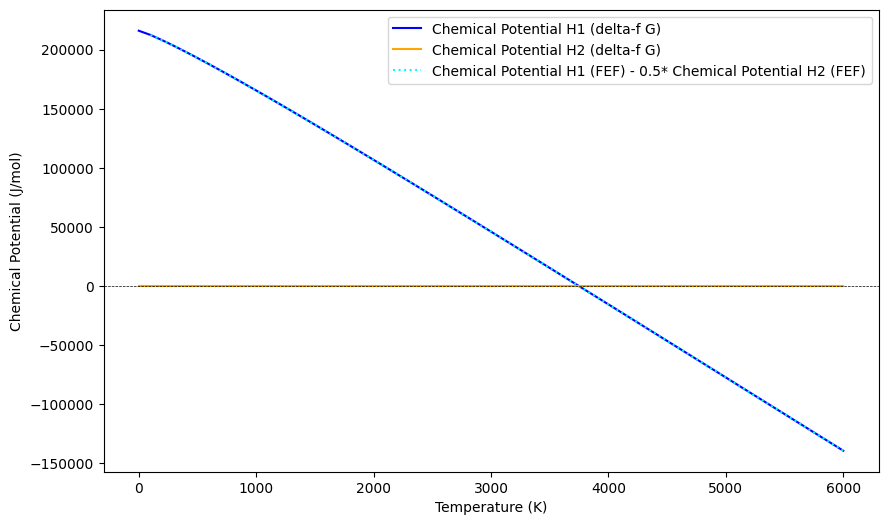

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(T_h_table, mu_h_table , label='Chemical Potential H1 (delta-f G)', color='blue')
plt.plot(T_h2_table, mu_h2_table , label='Chemical Potential H2 (delta-f G)', color='orange')
plt.plot(T_h_table, mu_fef_h_table - 0.5*mu_fef_h2_table, label='Chemical Potential H1 (FEF) - 0.5* Chemical Potential H2 (FEF)', linestyle='dotted', color='cyan')
#plt.plot(T_h2_table, mu_fef_h2_table, label='Chemical Potential H2 (FEF)', linestyle='--', color='orange')

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Temperature (K)')
plt.ylabel('Chemical Potential (J/mol)')
plt.legend()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from exogibbs.utils.constants import R_gas_constant_si
from exogibbs.equilibrium.gibbs import interpolate_chemical_potential_one

In [8]:
def mu_h(T, mu_h_table_in):
    return interpolate_chemical_potential_one(T, T_h_table, mu_h_table_in, order=2)


def mu_h2(T, mu_h2_table_in):
    return interpolate_chemical_potential_one(T, T_h2_table, mu_h2_table_in, order=2)


def compute_k(P, T, mu_h_table_in, mu_h2_table_in, Pref=1.0):
    delta_mu = mu_h2(T, mu_h2_table_in) - 2.0 * mu_h(T, mu_h_table_in)
    RT = R_gas_constant_si * T
    return np.exp(-delta_mu / RT) * P / Pref


Tarr = np.linspace(10.0, 6000.0, 300)
Parr = np.logspace(-8.0, 2.0, 300)


def nh(k):
    return 1.0 / np.sqrt(4.0 * k + 1.0)


def nh2(k):
    return 0.5 * (1.0 - nh(k))


def ntotal(k):
    return nh(k) + nh2(k)


def vmr_h(k):
    return nh(k) / ntotal(k)


def vmr_h2(k):
    return nh2(k) / ntotal(k)

/tmp/ipykernel_11215/2351232233.py:12: RuntimeWarning: overflow encountered in exp
  return np.exp(-delta_mu / RT) * P / Pref


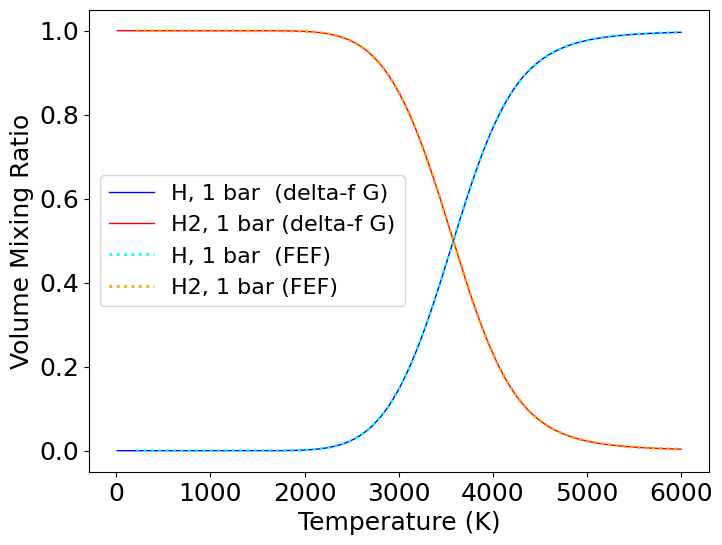

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(Tarr, vmr_h(compute_k(1.0,Tarr, mu_h_table , mu_h2_table)), label='H, 1 bar  (delta-f G)', color='blue', lw=1)
plt.plot(Tarr, vmr_h2(compute_k(1.0,Tarr, mu_h_table , mu_h2_table)), label='H2, 1 bar (delta-f G)', color='red', lw=1)

plt.plot(Tarr, vmr_h(compute_k(1.0,Tarr, mu_fef_h_table, mu_fef_h2_table)), label='H, 1 bar  (FEF)', color='cyan', ls='dotted', lw=2)
plt.plot(Tarr, vmr_h2(compute_k(1.0,Tarr, mu_fef_h_table, mu_fef_h2_table)), label='H2, 1 bar (FEF)', color='orange', ls='dotted', lw=2)


#plt.xscale('log')
#plt.yscale('log')
#plt.gca().invert_xaxis()
plt.tick_params(labelsize=18)
plt.xlabel("Temperature (K)",fontsize=18)
plt.ylabel('Volume Mixing Ratio', fontsize=18)
plt.legend(fontsize=16, loc='center left')
